In [62]:
source_directory = "/home/jacktran/RAG/learning/files/"
target_directory = "/home/jacktran/RAG/learning/target_files/"

# extract file

In [59]:
from pdfminer.high_level import extract_text
import os
import pandas as pd

In [16]:
def extract_pdf(pdf_path: str, store_path: str) -> None:
    text = extract_text(pdf_path)
    with open(store_path, 'w', encoding= "UTF-8") as file:
        file.write(text)

In [88]:
text = extract_text("/home/jacktran/RAG/learning/files/491b8725-5abe-4151-b38b-c0dd1b7f7420.pdf")
print(text)

In [17]:
def extract_all_in_directory(source: str, target: str) -> None:
    if not os.path.exists(target):
        os.mkdir(target)

    for file in os.listdir(source):
        if file.endswith(".pdf"):
            file_path = os.path.join(source, file)
            target_file= file.split(".")[0] + ".txt"
            target_file_path = os.path.join(target, target_file)
            extract_pdf(file_path, target_file_path)
            print(f"extract from {file_path} to {target_file_path}")

In [103]:
extract_all_in_directory(source_directory, target_directory)

extract from /home/jacktran/RAG/learning/files/VCB_cap-nhat_ACBS_10.12.2025-VN.pdf to /home/jacktran/RAG/learning/target_files/VCB_cap-nhat_ACBS_10.txt
extract from /home/jacktran/RAG/learning/files/927ac79f-30b6-420c-af2f-9229ba129bdf.pdf to /home/jacktran/RAG/learning/target_files/927ac79f-30b6-420c-af2f-9229ba129bdf.txt
extract from /home/jacktran/RAG/learning/files/491b8725-5abe-4151-b38b-c0dd1b7f7420.pdf to /home/jacktran/RAG/learning/target_files/491b8725-5abe-4151-b38b-c0dd1b7f7420.txt
extract from /home/jacktran/RAG/learning/files/SSI_Q3_25_a82298dac6.pdf to /home/jacktran/RAG/learning/target_files/SSI_Q3_25_a82298dac6.txt
extract from /home/jacktran/RAG/learning/files/Baocaocapnhat_VPB_Q3_VN.pdf to /home/jacktran/RAG/learning/target_files/Baocaocapnhat_VPB_Q3_VN.txt
extract from /home/jacktran/RAG/learning/files/5fa639a7-4e66-495c-9e6f-22732ac748f4.pdf to /home/jacktran/RAG/learning/target_files/5fa639a7-4e66-495c-9e6f-22732ac748f4.txt
extract from /home/jacktran/RAG/learning/

# Cleaning and chunking

In [103]:
def cleaning(serie: pd.Series) -> pd.Series:
    return (
        serie
        .str.replace(r'\n{2,}', '. ', regex=True)
        .str.replace(r'\s+', ' ', regex=True)
        .str.replace(' . ', '. ') 
        .str.strip()      
    )



In [108]:
df = pd.DataFrame(columns = ["file", "text"])
for file in os.listdir(target_directory):
    with open(target_directory + file, 'r', encoding= "UTF-8") as f:
        text = f.read()
        row = {'file': file, 'text': text}
        df_tmp = pd.DataFrame([row])
        # df_tmp["text"] = df_tmp["file"] + '. ' + cleaning(df_tmp["text"])
        df_tmp["text"] = cleaning(df_tmp["text"])
        df = pd.concat([df, df_tmp], ignore_index = True)


In [105]:
df

,file,text
0,SSI_Q3_25_a82298dac6.txt,THEO DÕI. Giá mục tiêu 2026:. % tăng giá:. Cập...
1,5fa639a7-4e66-495c-9e6f-22732ac748f4.txt,BỘ GIÁO DỤC VÀ ĐÀO TẠO CỘNG HÒA XÃ HÔ...
2,927ac79f-30b6-420c-af2f-9229ba129bdf.txt,BỘ GIÁO DỤC VÀ ĐÀO TẠO TRƯỜNG ĐẠI HỌC QUY NHƠN...
3,5641fb20-d894-499c-8b68-8477d24c992f.txt,BỘ GIÁO DỤC VÀ ĐÀO TẠO TRƯỜNG ĐẠI HỌC QUY NHƠN...
4,VCB_cap-nhat_ACBS_10.txt,Cập nhật VCB – KHẢ QUAN. 10/12/2025. Phòng Phâ...
5,download-with-token (1).txt,ACB – Ngân hàng TMCP Á Châu (HSX). Hồi phục tr...
6,3ac90064-2e23-43cc-9e7f-6b9ea653b552.txt,BỘ GIÁO DỤC VÀ ĐÀO TẠO TRƯỜNG ĐẠI HỌC QUY NHƠN...
7,491b8725-5abe-4151-b38b-c0dd1b7f7420.txt,
8,Baocaocapnhat_VPB_Q3_VN.txt,Báo cáo cập nhật. Ngân hàng TMCP Việt Nam Thịn...


In [97]:
df.loc[7,"text"]

''

In [109]:
df = df[df["text"] != ""].reset_index()
df = df.drop(columns=["index"])
df

,file,text
0,SSI_Q3_25_a82298dac6.txt,THEO DÕI. Giá mục tiêu 2026:. % tăng giá:. Cập...
1,5fa639a7-4e66-495c-9e6f-22732ac748f4.txt,BỘ GIÁO DỤC VÀ ĐÀO TẠO CỘNG HÒA XÃ HÔ...
2,927ac79f-30b6-420c-af2f-9229ba129bdf.txt,BỘ GIÁO DỤC VÀ ĐÀO TẠO TRƯỜNG ĐẠI HỌC QUY NHƠN...
3,5641fb20-d894-499c-8b68-8477d24c992f.txt,BỘ GIÁO DỤC VÀ ĐÀO TẠO TRƯỜNG ĐẠI HỌC QUY NHƠN...
4,VCB_cap-nhat_ACBS_10.txt,Cập nhật VCB – KHẢ QUAN. 10/12/2025. Phòng Phâ...
5,download-with-token (1).txt,ACB – Ngân hàng TMCP Á Châu (HSX). Hồi phục tr...
6,3ac90064-2e23-43cc-9e7f-6b9ea653b552.txt,BỘ GIÁO DỤC VÀ ĐÀO TẠO TRƯỜNG ĐẠI HỌC QUY NHƠN...
7,Baocaocapnhat_VPB_Q3_VN.txt,Báo cáo cập nhật. Ngân hàng TMCP Việt Nam Thịn...


In [110]:
csv_file = "processed/pdf_text.csv"

In [111]:
df.to_csv(csv_file)

In [128]:
from transformers import AutoTokenizer
MODEL_ID = "sentence-transformers/all-MiniLM-L6-v2"

tokenizer = AutoTokenizer.from_pretrained(MODEL_ID)

df = pd.read_csv(csv_file, index_col = 0)
df['n_tokens'] = df['text'].apply(lambda x: len(tokenizer.encode(x)))


Token indices sequence length is longer than the specified maximum sequence length for this model (3831 > 512). Running this sequence through the model will result in indexing errors


In [121]:
df

,file,text,n_tokens
0,SSI_Q3_25_a82298dac6.txt,THEO DÕI. Giá mục tiêu 2026:. % tăng giá:. Cập...,3831
1,5fa639a7-4e66-495c-9e6f-22732ac748f4.txt,BỘ GIÁO DỤC VÀ ĐÀO TẠO CỘNG HÒA XÃ HÔ...,1293
2,927ac79f-30b6-420c-af2f-9229ba129bdf.txt,BỘ GIÁO DỤC VÀ ĐÀO TẠO TRƯỜNG ĐẠI HỌC QUY NHƠN...,328
3,5641fb20-d894-499c-8b68-8477d24c992f.txt,BỘ GIÁO DỤC VÀ ĐÀO TẠO TRƯỜNG ĐẠI HỌC QUY NHƠN...,2572
4,VCB_cap-nhat_ACBS_10.txt,Cập nhật VCB – KHẢ QUAN. 10/12/2025. Phòng Phâ...,10668
5,download-with-token (1).txt,ACB – Ngân hàng TMCP Á Châu (HSX). Hồi phục tr...,1455
6,3ac90064-2e23-43cc-9e7f-6b9ea653b552.txt,BỘ GIÁO DỤC VÀ ĐÀO TẠO TRƯỜNG ĐẠI HỌC QUY NHƠN...,1836
7,Baocaocapnhat_VPB_Q3_VN.txt,Báo cáo cập nhật. Ngân hàng TMCP Việt Nam Thịn...,10477


In [122]:
df['n_tokens']

0     3831
1     1293
2      328
3     2572
4    10668
5     1455
6     1836
7    10477
Name: n_tokens, dtype: int64

In [123]:
df.loc[1,'text']

'BỘ GIÁO DỤC VÀ ĐÀO TẠO CỘNG HÒA XÃ HỘI CHỦ NGHĨA VIỆT NAM TRƯỜNG ĐẠI HỌC QUY NHƠN. Độc lập -Tự do - Hạnh phúc. Số: /TB-ĐHQN. Gia Lai, ngày tháng năm 2025. THÔNG BÁO Về thời gian đào tạo tối đa trình độ thạc sĩ của các khoá 24B, 25A, 25B, 26A. Căn cứ Thông tư số 23/2021/TT-BGDĐT ngày 30/8/2021 của Bộ trưởng Bộ. Giáo dục và Đào tạo ban hành Quy chế tuyển sinh và đào tạo trình độ thạc sĩ;. Căn cứ Quyết định số 2705/QĐ-ĐHQN ngày 21/10/2021 của Hiệu trưởng về việc ban hành Quy chế tuyển sinh và đào tạo trình độ thạc sĩ của Trường Đại học Quy Nhơn;. Căn cứ các Quyết định về việc công nhận học viên cao học các khoá 24B,. 25A, 25B, 26A của Hiệu trưởng Trường Đại học Quy Nhơn,. Thời gian tối đa để học viên hoàn thành khoá học không vượt quá 02 lần thời. gian theo kế hoạch học tập chuẩn toàn khoá.. Đối chiếu với các quy định trên, thời hạn tối đa để học viên hoàn thành khóa. học của các khoá 24B, 25A, 25B, 26A như sau:. TT. Khoá đào tạo. Thời hạn tối đa để học viên h

In [124]:

MAX_TOKEN = 384
def split_text(text: str, max_token = MAX_TOKEN) -> list[int]:
    sentences = text.split('.')
    return [len(tokenizer.tokenize(" " + sentence)) for sentence in sentences]

for _, row in df.iterrows():
    if row['n_tokens'] > MAX_TOKEN:
        print(max(split_text(row['text'])))

143
140
150
170
113
100
141


In [129]:
MODEL_ID = "sentence-transformers/all-MiniLM-L6-v2"
def chunking_text(text: str, max_token: int = 384, over_lap: int = 30, MODEL_ID = MODEL_ID) -> list[str]:
    sentences = text.split(". ")
    
    tokenizer = AutoTokenizer.from_pretrained(MODEL_ID)
    n_tokens = [len(tokenizer.encode(sentence, add_special_tokens=False)) for sentence in sentences]
    print("test")

    chunks = []
    current_chunk = []
    current_tokens = 0
    overlap_text = ''

    for sentence, token_len in zip(sentences, n_tokens):

        if current_tokens + token_len + over_lap > max_token:
            if not chunks:
                chunk_text = ". ".join(current_chunk) + "."
                chunks.append(chunk_text)
                current_chunk = []
                current_tokens = 0
            else:
                overlap_text = tokenizer.decode(
                    tokenizer.encode(chunks[-1], add_special_tokens=False)[-over_lap:]
                ).strip()
                chunks.append(overlap_text + " " + ". ".join(current_chunk) + ".")
                current_chunk = []
                current_tokens = 0

        current_chunk.append(sentence)
        current_tokens += token_len + 3
    return chunks

shortened = []
for _, row in df.iterrows():
    if row['text'] is None:
        continue

    if row['n_tokens'] > MAX_TOKEN:
        shortened += chunking_text(row['text'], 512)
    else:
        shortened.append(row['text'])

test
test
test
test
test
test
test


<Axes: >

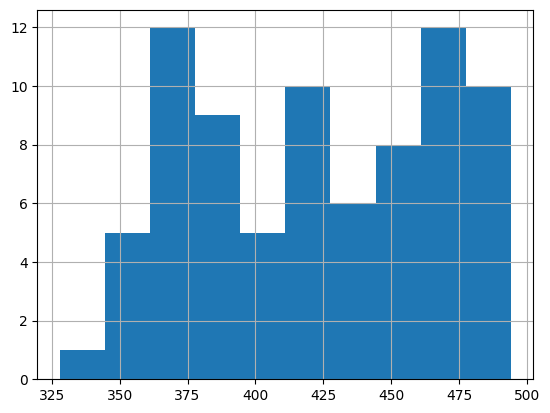

In [130]:
df1 = pd.DataFrame(shortened, columns = ['text'])
df1['n_tokens'] = df1.text.apply(lambda x: len(tokenizer.encode(x)))
df1.n_tokens.hist()

In [43]:
df.n_tokens.max()


494

# Embedding

In [131]:
from sentence_transformers import SentenceTransformer

In [132]:
model = SentenceTransformer(MODEL_ID)

In [133]:
def get_embedding(text: str):
    text = text.replace("\n", " ")
    return model.encode(text, normalize_embeddings=True).tolist()

df1["embeddings"] = df1["text"].apply(get_embedding)

In [135]:
import numpy as np

embeddings = np.array(df1["embeddings"].tolist())
embeddings.shape


(78, 384)